<a href="https://colab.research.google.com/github/wnandirta/PCVK_Genap_2022/blob/main/pcvkjs3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

Mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan 50


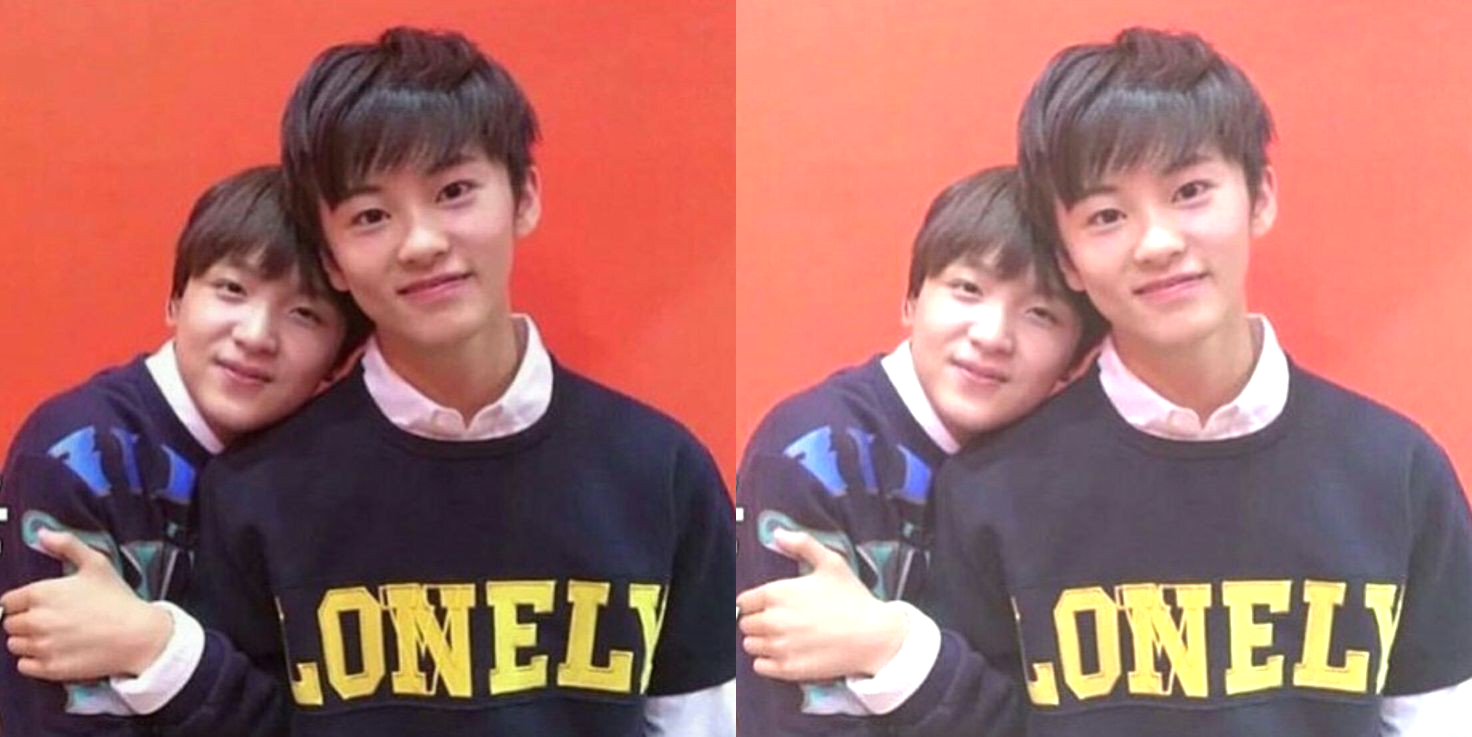

In [4]:
print('Mengubah tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/Image/mahae.jpg')
brightness_image = np.zeros(original.shape, original.dtype)

#Akses per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#Cara simple for loop
#brightness_image = cv.convertScaleAbs(original, )

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

Mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan [-255 - 255] : 50
Masukkan kontras [1.0 -3.0] : 2.0


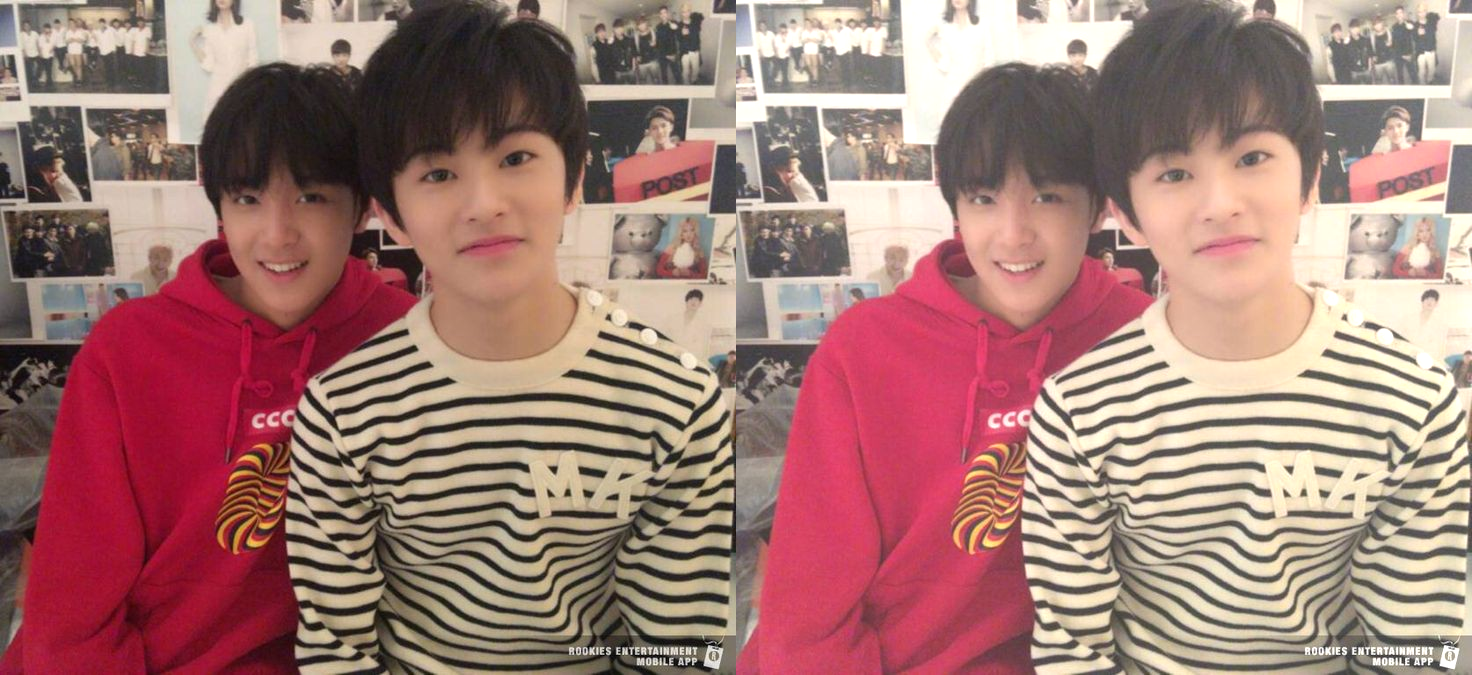

In [5]:
#Task 1
print('Mengubah tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan [-255 - 255] : '))
except ValueError:
  print('Error, not a number')

try:
  contrast = float(input('Masukkan kontras [1.0 -3.0] : '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/Image/mahae2.jpg')
brightness_image = np.zeros(original.shape, original.dtype)


#Akses per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

Mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan [-255 - 255] : 50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


Text(0.5, 1.0, 'After')

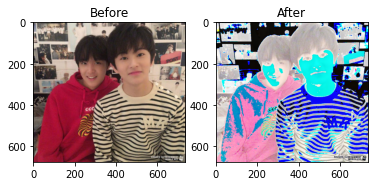

In [9]:
#Task 2
print('Mengubah tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan [-255 - 255] : '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/Image/mahae2.jpg')
rgb_original = cv.cvtColor(original, cv.COLOR_BGR2RGB)
log_image = brightness * (np.log(rgb_original + 1))

#apply log transformation method
c = 255 / np.log(1 + np.max(rgb_original + 1))

#specify the data type so the float value will be converted to int
log_image = np.array(log_image, dtype = np.uint8)

#display both images
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(rgb_original)
ax.set_title('Before')

ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(log_image)
ax.set_title('After')


Text(0.5, 1.0, '[Luminance] After')

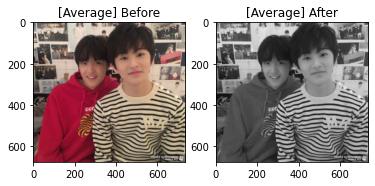

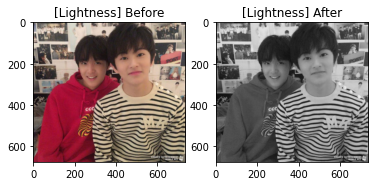

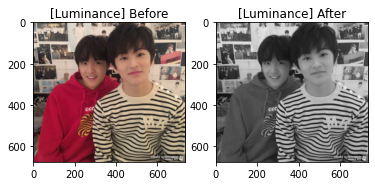

In [10]:
#Task 3
original = cv.imread('/content/drive/MyDrive/PCVK/Image/mahae2.jpg')
fix_image = cv.cvtColor(original, cv.COLOR_BGR2RGB)
R, G, B = fix_image[:,:,0], fix_image[:,:,1], fix_image[:,:,2]

#Average
gc_average_img = np.mean(fix_image, axis=2)

#Lightness
gc_lightness_img = cv.cvtColor(original, cv.COLOR_BGR2RGB);
gc_lightness_img[:] = np.max(fix_image, axis=-1,keepdims=1)/2 + np.min(fix_image,axis=-1,keepdims=1)/2

#Luminance
gc_luminance_img = 0.2989 * R + 0.5870 * G + 0.1140 * B

fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(fix_image)
ax.set_title('[Average] Before')

ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(gc_average_img, cmap='gray')
ax.set_title('[Average] After')

fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(fix_image)
ax.set_title('[Lightness] Before')

ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(gc_average_img, cmap='gray')
ax.set_title('[Lightness] After')

fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(fix_image)
ax.set_title('[Luminance] Before')

ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(gc_average_img, cmap='gray')
ax.set_title('[Luminance] After')

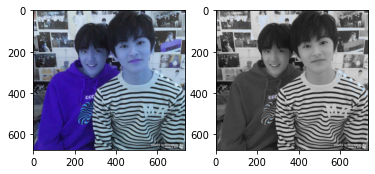

In [13]:
#Task 4
img = cv.imread('/content/drive/MyDrive/PCVK/Image/mahae2.jpg')
img_rgb = cv.imread('/content/drive/MyDrive/PCVK/Image/mahae2.jpg')
ret, mask = cv.threshold(img[:,:,2], 230, 255, cv.THRESH_BINARY)

mask1 = np.zeros_like(img)
mask1[:,:,0]= mask
mask1[:,:,1]= mask
mask1[:,:,2]= mask

red = cv.bitwise_and(img_rgb, mask1)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)

gray = cv.bitwise_and(img, 255 - mask1)

out = gray + red
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(out, cmap='gray')